## Analysis of Errors in Model Evaluation

This notebook retrieves the data outputted by the model and displays the items where the models evaluated a trait to be False.


For each model, it displays the following:
* Question item with image
* Failed trait name
* Provided reasoning

In [13]:
import pandas as pd
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import textwrap

In [14]:
# data paths
input_data_path = r"/Users/miriam/projects/multimodal_validators/MMLLMValidatorsTesting/data/results/ALL_MODELS_clean_results.csv"
question_data_path = r"/Users/miriam/projects/multimodal_validators/MMLLMValidatorsTesting/data/ScienceQA_test_mc_images.csv"
image_base_path = r"/Users/miriam/projects/multimodal_validators/MMLLMValidatorsTesting/data/ScienceQA_images/test/"

In [15]:
# load all required data
data = pd.read_csv(input_data_path, usecols=["question_id", "model_id","trait", "validity", "reasoning"])
question_data = pd.read_csv(question_data_path)
question_data.set_index("question_id", inplace=True)

In [18]:
# %%
df = data[(data["validity"] == False) & (data["trait"].str.lower() == "text-image coherence")]
display(df.head())

,question_id,model_id,trait,validity,reasoning
26,234,google/gemma-3-27b-it,Text-Image Coherence,False,The image shows an architect studying a design...
248,541,google/gemma-3-27b-it,Text-Image Coherence,False,The image shows a desert landscape and three d...
374,402,google/gemma-3-27b-it,Text-Image Coherence,False,The question asks about an animal camouflaged ...
568,332,google/gemma-3-27b-it,Text-Image Coherence,False,"The image shows three animals, but the questio..."
622,42,GPT4oMini,Text-Image Coherence,False,The image shows a Punnett square with only rec...


In [19]:

def show_errors(model_id: str, trait: str, question_id: int, question_text: str, reasoning: str, image: Image):
    """
    Display the image, question, and reasoning for a single error item.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.imshow(image)
    ax1.axis("off")

    wrapped_question = textwrap.fill(f"Question {question_id}: {question_text}", width=60)
    wrapped_reasoning = textwrap.fill(f"Reasoning: {reasoning}", width=60)

    ax2.text(0.0, 0.95, f"Model: {model_id}", fontweight="bold", fontsize=16, ha='left', va="top")
    ax2.text(0.0, 0.80, f"Failed Trait: {trait}", fontsize=12, ha='left', va="top")
    ax2.text(0.0, 0.65, wrapped_question, fontsize=12, ha='left', va="top", wrap=True)
    ax2.text(0.0, 0.35, wrapped_reasoning, fontsize=12, ha='left', va="top", wrap=True)
    ax2.axis('off')

    plt.tight_layout()
    plt.show();





--- Displaying Error for question_id: 945 (Model: GPT4oMini) ---


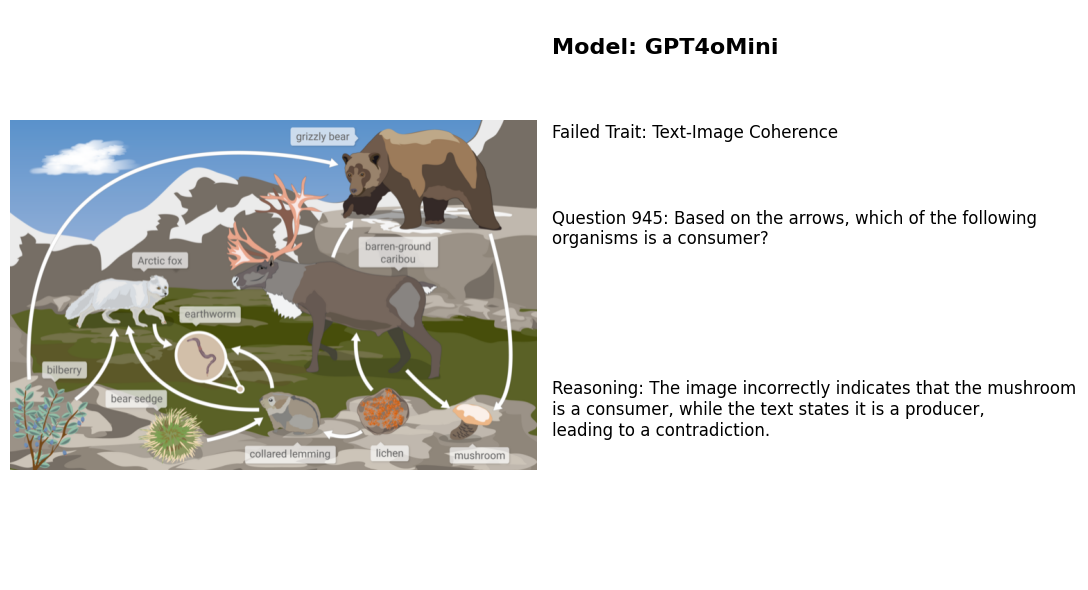

----------------------------------------------------------------------
--- Displaying Error for question_id: 964 (Model: GPT4oMini) ---


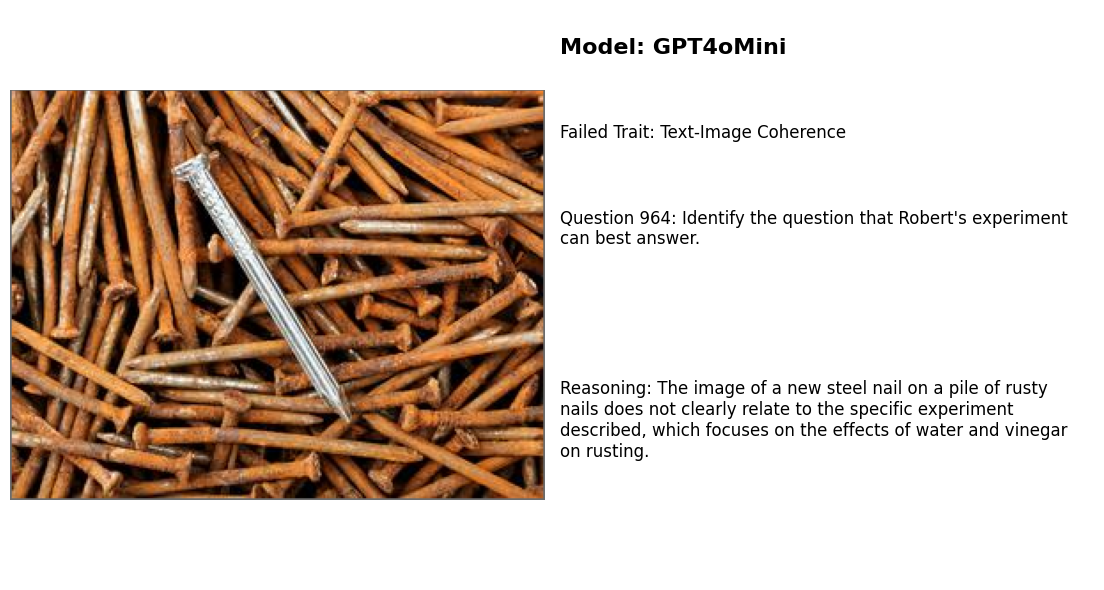

----------------------------------------------------------------------
--- Displaying Error for question_id: 843 (Model: Qwen/Qwen2.5-VL-72B-Instruct) ---


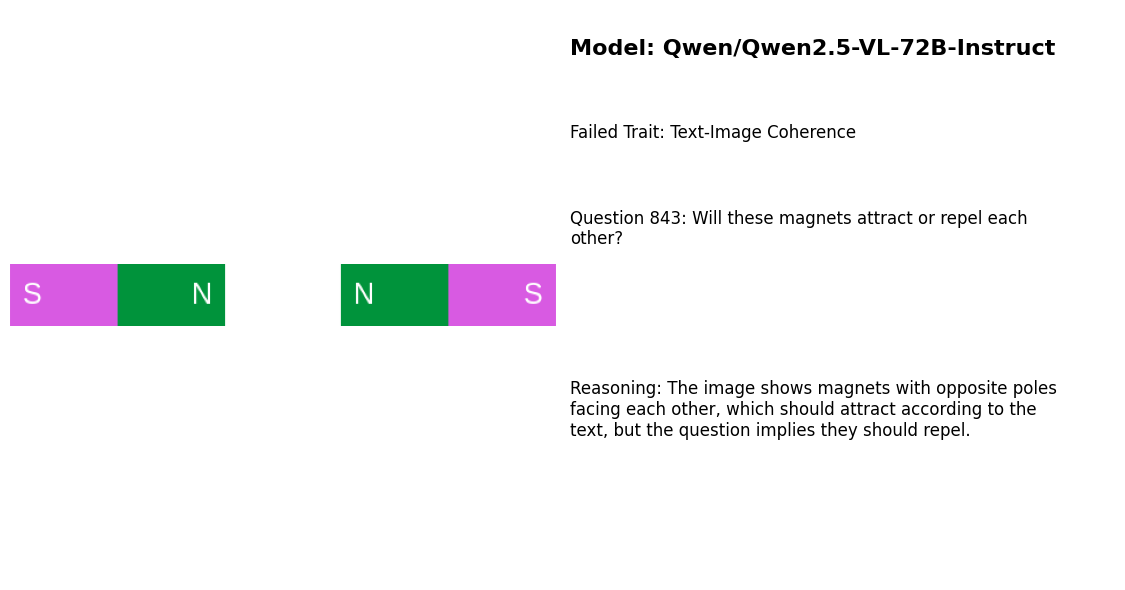

----------------------------------------------------------------------
--- Displaying Error for question_id: 640 (Model: Qwen/Qwen2.5-VL-72B-Instruct) ---


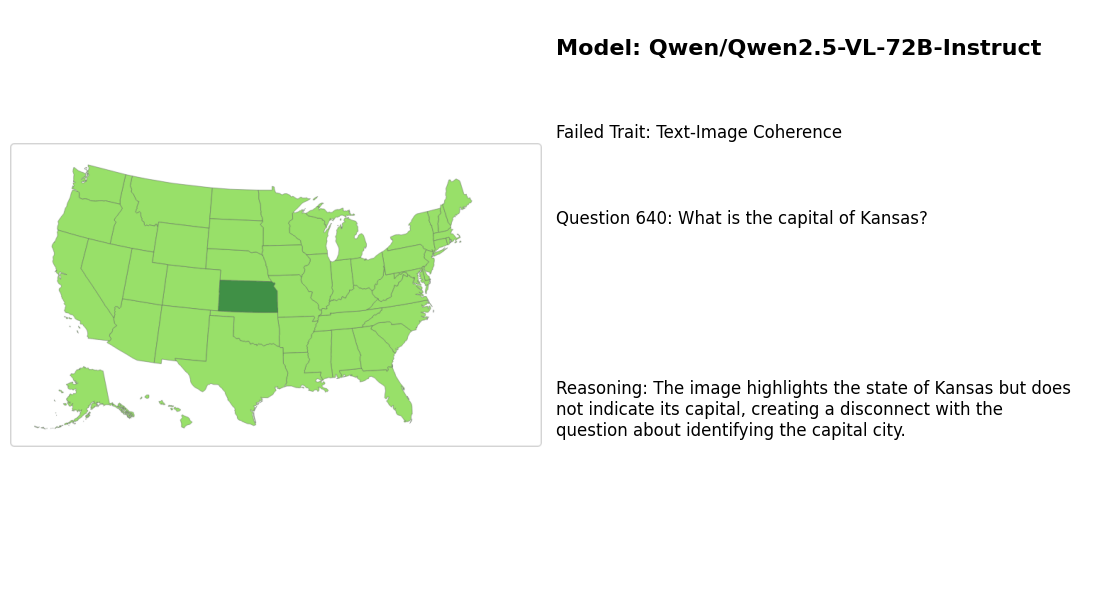

----------------------------------------------------------------------
--- Displaying Error for question_id: 600 (Model: GPT4oMini) ---


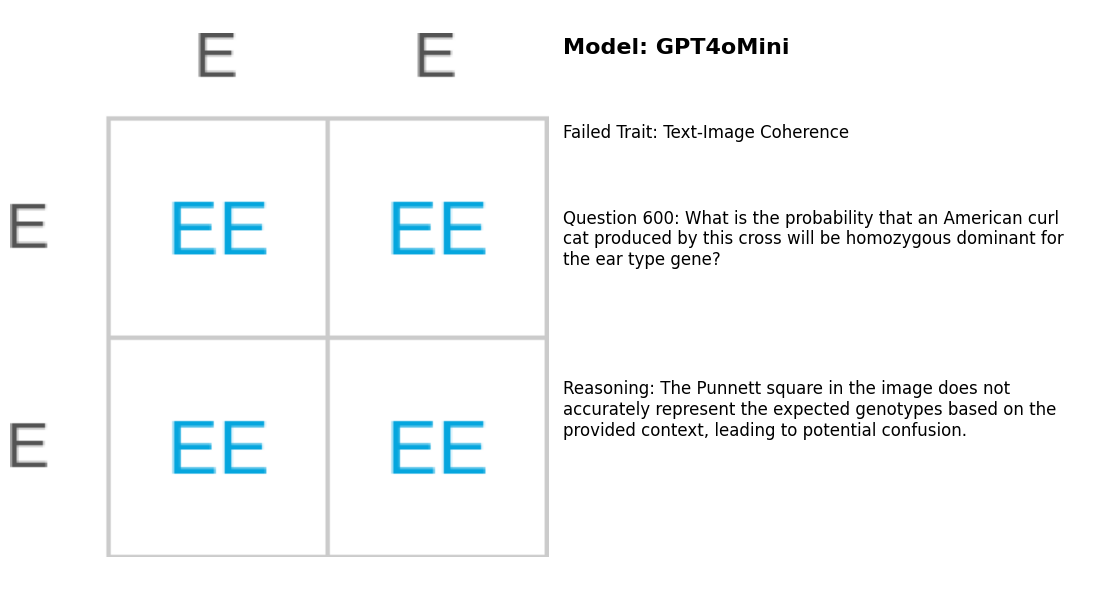

----------------------------------------------------------------------
--- Displaying Error for question_id: 849 (Model: Qwen/Qwen2.5-VL-72B-Instruct) ---


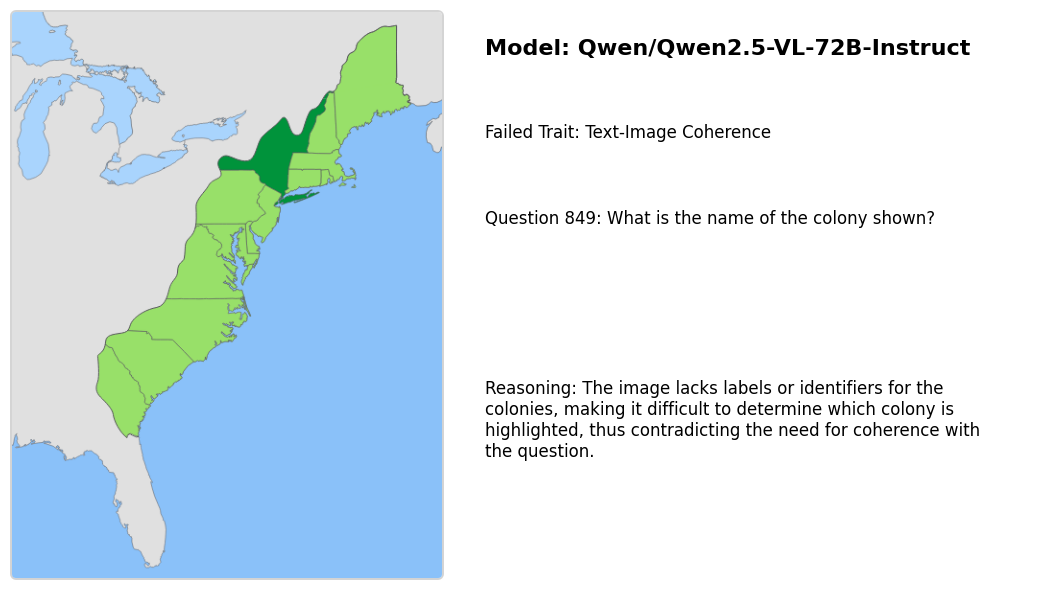

----------------------------------------------------------------------
--- Displaying Error for question_id: 237 (Model: Qwen/Qwen2.5-VL-72B-Instruct) ---


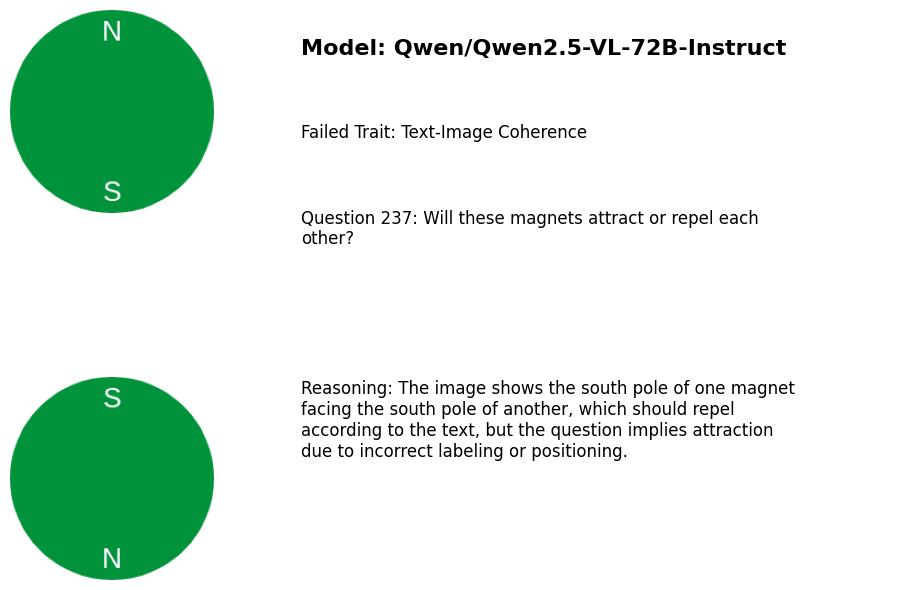

----------------------------------------------------------------------
--- Displaying Error for question_id: 752 (Model: GPT4oMini) ---


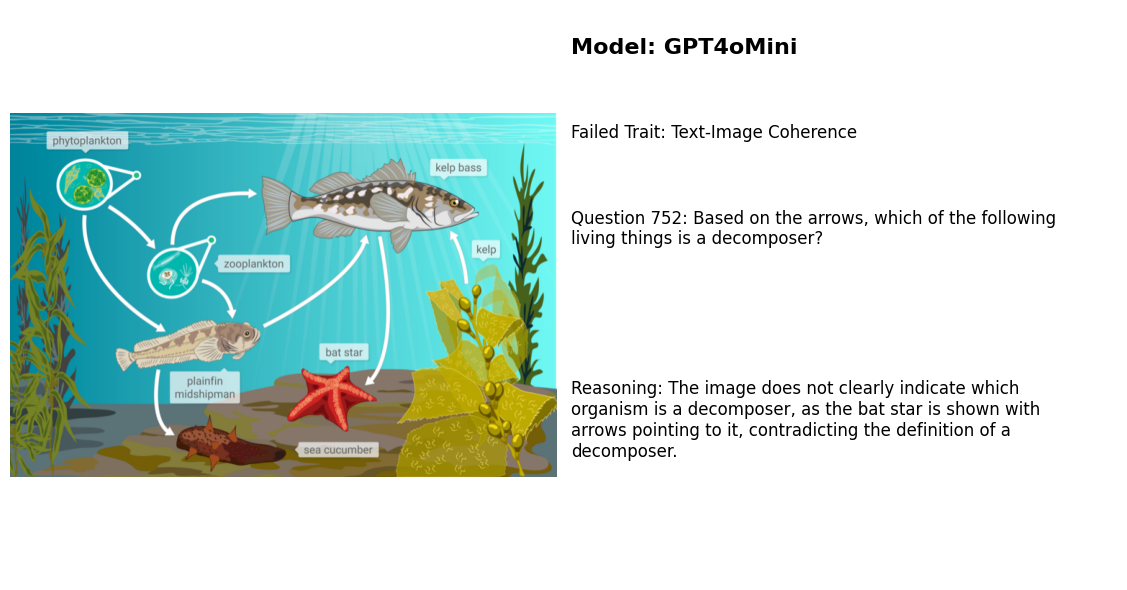

----------------------------------------------------------------------
--- Displaying Error for question_id: 541 (Model: GPT4oMini) ---


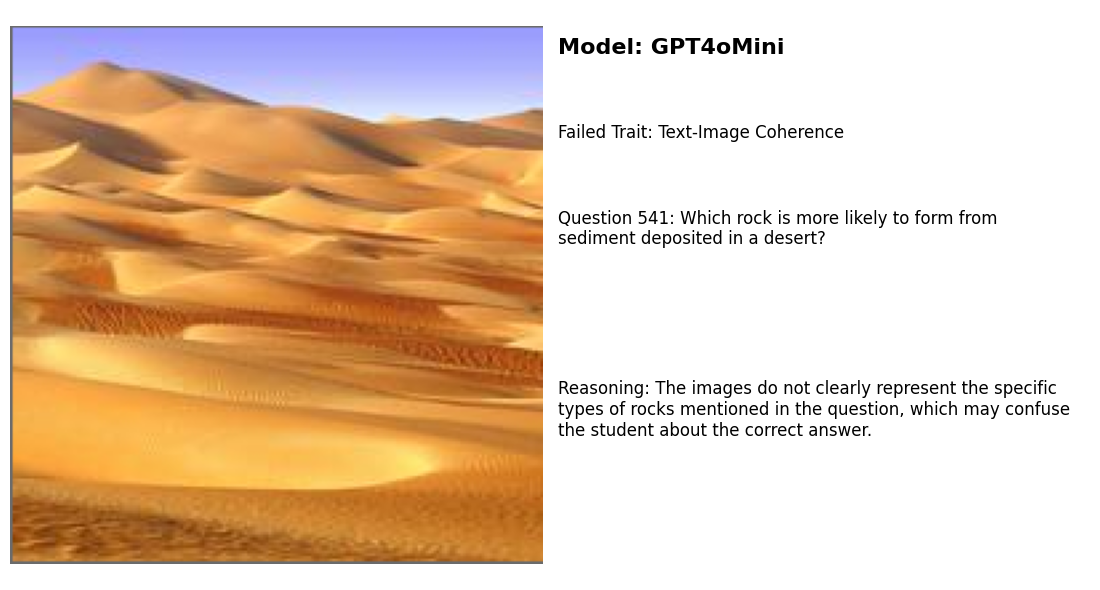

----------------------------------------------------------------------
--- Displaying Error for question_id: 23 (Model: Qwen/Qwen2.5-VL-72B-Instruct) ---


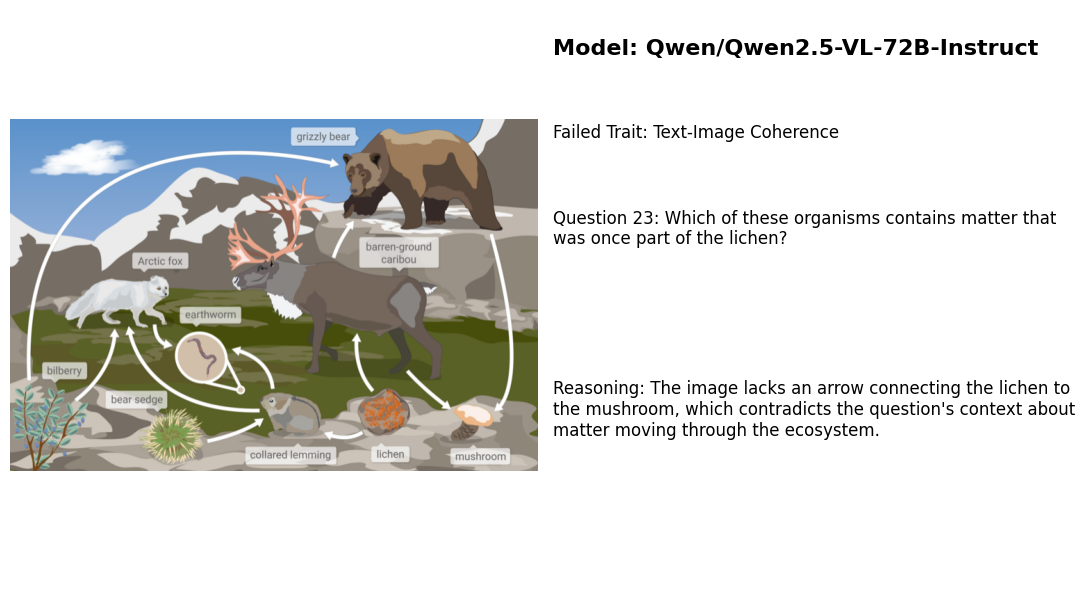

----------------------------------------------------------------------


In [23]:
num_rows = len(df)
num_to_sample = min(10, num_rows)

if num_to_sample == 0:
    print("No errors found matching the filter criteria.")
else:
    # getting a random sample of the data (it will be a shorter dataframe)
    random_sample = df.sample(n=num_to_sample)

    for index, row in random_sample.iterrows():

        q_id = row["question_id"]
        model = row["model_id"]
        trait = row["trait"]
        reasoning = row["reasoning"]

        # find question text based on question id
        try:
            question_text = question_data.loc[q_id]["question"]
        except KeyError:
            print(f"Error: Could not find question_id {q_id} in question_data.")
            continue

        # load image corresponding to question based on question id
        try:
            image_path = f"{image_base_path}{q_id}/image.png"
            image = Image.open(image_path)
        except FileNotFoundError:
            print(f"Error: Could not find image at {image_path}.")
            image = Image.new('RGB', (200, 200), color = 'grey')  # placeholder image
        except Exception as e:
            print(f"An error occurred loading image {q_id}: {e}")
            continue

        # display the error using the function defined above
        print(f"--- Displaying Error for question_id: {q_id} (Model: {model}) ---")
        show_errors(
            model_id=model,
            trait=trait,
            question_id=q_id,
            question_text=question_text,
            reasoning=reasoning,
            image=image
        )
        print("-" * 70)

